In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data\한국전력공사_지역별 전기차 현황정보_20240731.csv')
df

,기준일,서울,인천,경기,강원,충북,충남,대전,세종,경북,대구,전북,전남,광주,경남,부산,울산,제주
0,2023-04-30,62385,29464,87779,15218,16996,19487,15301,3444,22349,26092,15852,19169,10028,26661,26191,6050,35020
1,2023-05-31,63807,30905,90624,15728,17511,20225,15564,3562,23023,26691,16256,19966,10303,27593,27147,6207,35619
2,2023-06-30,65614,32065,93995,16143,17903,20677,15904,3674,23520,27263,16668,20874,10609,28799,28466,6492,36262
3,2023-07-31,66528,33248,97738,16459,18100,21437,16138,3778,24347,27911,17302,21368,10853,30888,29037,6813,36903
4,2023-08-31,67351,34094,99925,16723,18739,21656,16263,3882,24645,28336,17623,21708,11054,31767,30148,6960,37342
5,2023-09-30,68892,35554,103704,17014,19095,22065,16559,4073,25051,28988,18187,22317,11318,32763,31096,7120,37689
6,2023-10-31,70194,36901,107342,17363,19416,23156,16841,4186,25664,29586,18658,22992,11757,34005,32418,7331,38098
7,2023-11-30,71591,38551,111466,17927,19713,23558,17418,4235,26234,30272,19390,23746,12235,35124,33770,7688,38894
8,2023-12-31,72937,40397,114117,18236,19972,24130,17889,4393,26776,30396,19795,24200,12538,36225,34643,7838,39418
9,2024-01-31,72877,40845,114735,18247,20003,24194,17981,4430,26934,30396,19827,24276,12529,36410,34789,7875,39439


In [5]:
df_melt = df.melt(id_vars=['기준일'],var_name='지역',value_name='자동차수')

In [6]:
df_melt.head()

,기준일,지역,자동차수
0,2023-04-30,서울,62385
1,2023-05-31,서울,63807
2,2023-06-30,서울,65614
3,2023-07-31,서울,66528
4,2023-08-31,서울,67351


In [ ]:
# 파생변수 , '년', '월'
df_melt[['년','월','일']] = df_melt['기준일'].str.split('-',expand=True)
df_melt

In [12]:
df_melt['년도']=df_melt['기준일'].str[:4]

In [13]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   자동차수    221 non-null    int64 
 3   년       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
 6   년도      221 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.2+ KB


In [14]:
df_melt['년도'] = df_melt['년도'].astype(int)

In [15]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   자동차수    221 non-null    int64 
 3   년       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
 6   년도      221 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 12.2+ KB


In [16]:
df_melt.head()

,기준일,지역,자동차수,년,월,일,년도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023


## 1. 지역별, 년도별 분석

In [25]:
# df_melt.groupby(['지역','년'],as_index=False)[['자동차수']].mean()

# 지역별 년도별 자동차수 평균 , pivot_table

year_tot = round(df_melt.pivot_table(index='지역',columns='년',values='자동차수',aggfunc='mean'),1)
year_tot.head()

년,2023,2024
지역,,
강원,16756.8,19032.2
경기,100743.3,126903.0
경남,31536.1,40523.8
경북,24623.2,29210.5
광주,11188.3,13262.5


<Axes: xlabel='지역'>

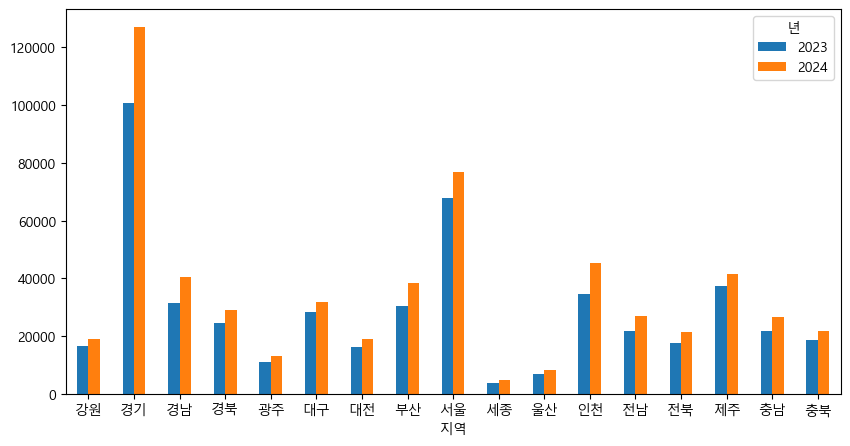

In [28]:
# 막대그래프, pandas.plot()
import matplotlib.pyplot as plt

plt.rc('font',family='malgun gothic')

year_tot.plot(kind='bar',figsize=(10,5),rot=0)


## 2023년 데이터 분석 : 지역별, 월별 통계

In [29]:
df_melt.head()

,기준일,지역,자동차수,년,월,일,년도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023


In [30]:
df_melt['년'].unique()

array(['2023', '2024'], dtype=object)

In [32]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     221 non-null    object
 1   지역      221 non-null    object
 2   자동차수    221 non-null    int64 
 3   년       221 non-null    object
 4   월       221 non-null    object
 5   일       221 non-null    object
 6   년도      221 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 12.2+ KB


In [37]:
df_melt.head()

,기준일,지역,자동차수,년,월,일,년도
0,2023-04-30,서울,62385,2023,04,30,2023
1,2023-05-31,서울,63807,2023,05,31,2023
2,2023-06-30,서울,65614,2023,06,30,2023
3,2023-07-31,서울,66528,2023,07,31,2023
4,2023-08-31,서울,67351,2023,08,31,2023


In [40]:
# 2023년 데이터 검색
# 방법 1 : df[조건식]
# 방법 2 : df.query('조건식')

df_melt_2023= df_melt.query("년=='2023'")   # df_melt[df_melt['년']=='2023']

In [68]:
# pivot table , 지역별 월별 자동차수 평균

df_2023 = df_melt_2023.pivot_table(index='지역',columns='월',values='자동차수',aggfunc='mean')

<Axes: xlabel='지역'>

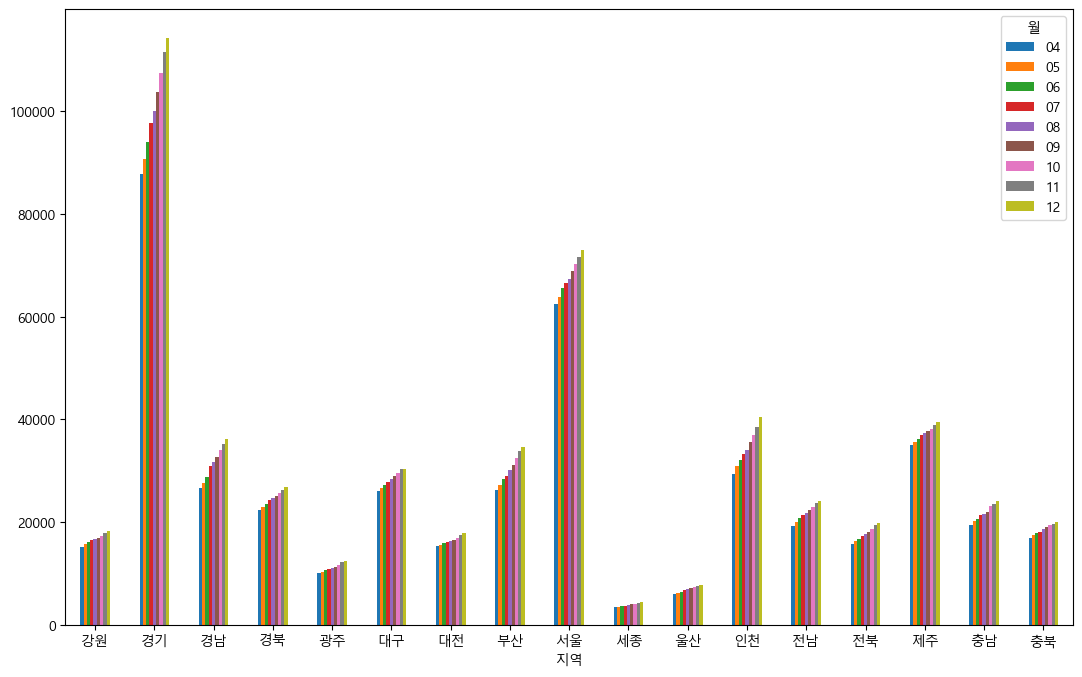

In [70]:
df_2023.plot(kind='bar',figsize=(13,8),rot=0)

In [71]:
df_2023.head()

월,04,05,06,07,08,09,10,11,12
지역,,,,,,,,,
강원,15218.0,15728.0,16143.0,16459.0,16723.0,17014.0,17363.0,17927.0,18236.0
경기,87779.0,90624.0,93995.0,97738.0,99925.0,103704.0,107342.0,111466.0,114117.0
경남,26661.0,27593.0,28799.0,30888.0,31767.0,32763.0,34005.0,35124.0,36225.0
경북,22349.0,23023.0,23520.0,24347.0,24645.0,25051.0,25664.0,26234.0,26776.0
광주,10028.0,10303.0,10609.0,10853.0,11054.0,11318.0,11757.0,12235.0,12538.0


검색가능한 지역들 : ['서울', '인천', '경기', '강원', '충북', '충남', '대전', '세종', '경북', '대구', '전북', '전남', '광주', '경남', '부산', '울산', '제주'] 


<Axes: title={'center': '강원 현황'}, xlabel='월'>

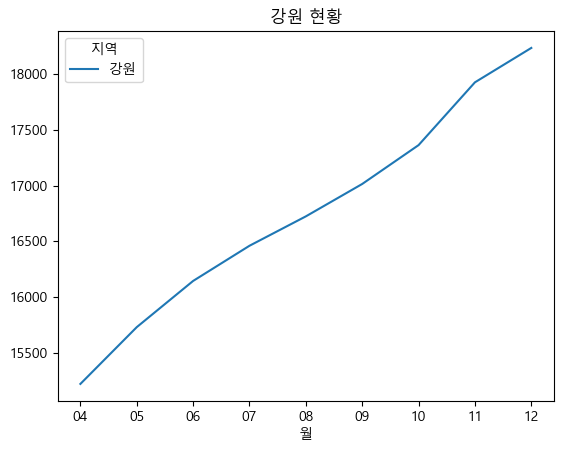

In [74]:
# 2023년 지역별 월별 통계
sidata = list(df_melt['지역'].unique())
print(f'검색가능한 지역들 : {sidata} ')
searchin = input('지역입력>> ')
temp = df_2023[df_2023.index==searchin]
temp = temp.T       #행, 열 바꾸기
temp.plot(title=searchin+' 현황')


## 2024년 분기별 분석

In [82]:
# 2024년 데이터 추출
df_2024= df_melt.query("년도==2024")
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 9 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     68 non-null     object
 1   지역      68 non-null     object
 2   자동차수    68 non-null     int64 
 3   년       68 non-null     object
 4   월       68 non-null     object
 5   일       68 non-null     object
 6   년도      68 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 4.2+ KB


In [85]:
# 월의 데이터 타입을 정수로 변환

df_2024['월'] = df_2024['월'].astype(int)
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 9 to 220
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기준일     68 non-null     object
 1   지역      68 non-null     object
 2   자동차수    68 non-null     int64 
 3   년       68 non-null     object
 4   월       68 non-null     int64 
 5   일       68 non-null     object
 6   년도      68 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 4.2+ KB


C:\Users\user\AppData\Local\Temp\ipykernel_2408\3722324900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['월'] = df_2024['월'].astype(int)


In [86]:
# 사용자 정의 함수 분기 계산
def get_quarter(month):
    if month >=1 and month <=3:
        return '1분기'
    elif 4<=month<=6:
        return '2분기'
    elif 7<=month<=9:
        return '3분기'
    elif 10<=month<=12:
        return '4분기'
    else:
        return '잘못된 값'
    

df_2024['분기']=df_2024['월'].map(get_quarter) 

C:\Users\user\AppData\Local\Temp\ipykernel_2408\3073822732.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['분기']=df_2024['월'].map(get_quarter)


In [89]:
# lambda 이용한 분기 계산
df_2024['분기_2']=df_2024['월'].map(lambda month : '1분기' if 1<=month<=3 else
                                 '2분기' if 4<=month<=6 else
                                 '3분기' if 7<=month<=9 else
                                 '4분기' if 10<=month<=12 else
                                 '잘못된 값') 

C:\Users\user\AppData\Local\Temp\ipykernel_2408\1527271525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['분기_2']=df_2024['월'].map(lambda month : '1분기' if 1<=month<=3 else


In [90]:
df_2024.head()

,기준일,지역,자동차수,년,월,일,년도,분기,분기_2
9,2024-01-31,서울,72877,2024,1,31,2024,1분기,1분기
10,2024-05-31,서울,76551,2024,5,31,2024,2분기,2분기
11,2024-06-30,서울,78215,2024,6,30,2024,2분기,2분기
12,2024-07-31,서울,79548,2024,7,31,2024,3분기,3분기
22,2024-01-31,인천,40845,2024,1,31,2024,1분기,1분기


In [96]:
# 지역별, 분기별 자동차수 평균, pivot table

df_2024_pivot = df_2024.pivot_table(index='지역',columns='분기',values='자동차수',aggfunc='mean')
df_2024_pivot

분기,1분기,2분기,3분기
지역,,,
강원,18247.0,19135.5,19611.0
경기,114735.0,129068.0,134741.0
경남,36410.0,41336.0,43013.0
경북,26934.0,29549.0,30810.0
광주,12529.0,13350.5,13820.0
대구,30396.0,31872.5,32631.0
대전,17981.0,19190.5,19933.0
부산,34789.0,38970.5,40368.0
서울,72877.0,77383.0,79548.0


<Axes: xlabel='지역'>

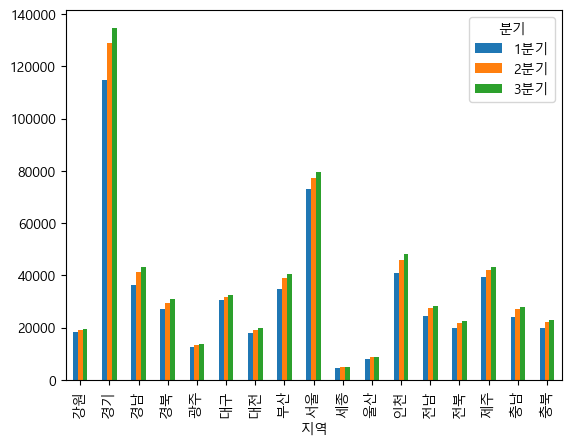

In [98]:
df_2024_pivot.plot(kind='bar')